# Integrating thye M ichaelis-Menten rate Law

Some rate laws are not easily integrated without very advanced mathematics. For example, below is the rate law for an enzyme catalyzed reaction (the famous Michaelis-Menten equation) and its analytical intergrated form...

$$-\frac{d[S]}{dt} = V_{max}\frac{[S]}{K_M + [S]} $$

$$-\int_{[S]_0}^{[S]t}\frac{K_M + [S]}{[S]}{d[S]} = \int_{0}^{t}V_{max}dt   $$


$$ [S]_t = K_M \cdot {W}(\frac{[S]_0}{K_M} e^{\frac{[S]_0-V_{max}t}{K_M}}) $$

...where '$W$' is the Lambert function. The Lambert function is defined as a function satisfying $W(z)e^{W(z)} = z$

## Symbolic Integration

Let us attempt to solve the differential equation for the Michaelis-Menten equation. As before we will define the reaction progress as the amount of substrate consumed, $x$. We can then say that...

$$ [S] = [S]_0 - x $$

This enables us to solve the differential equation for x.

$$-\frac{d}{dt}([S]_0 - x) = V_{max}\frac{[S]_0 - x}{K_M + [S]_0 - x} $$

$$\frac{dx}{dt} = V_{max}\frac{[S]_0 - x}{K_M + [S]_0 - x} $$

Now we will apply the integration..

$$-\int_{0}^{x_t}\frac{K_M + [S]_0 - x}{[S]_0 - x}{dx} = \int_{0}^{t}V_{max}dt   $$

I have no skills to even begin to approach solving this integration. Fortunately *SymPy* will do it for me (I hope). Try the code below.


In [93]:
import sympy as sym

t = sym.symbols('t')           ### create x as a 'symbol', not a variable
Vmax = sym.symbols('V_{max}')  ### create k as a 'symbol'
St = sym.symbols('S_t')        ### create At as a 'symbol'
S0 = sym.symbols('S_0')        ### create A0 as a 'symbol'
KM = sym.symbols('K_M')

xt = sym.Function('x_t')       ### create x as a 'function', not a variable

lhs = sym.Derivative(-St, t)   ### Using Derivative function to get differential of A(t) w.r.t. t
                               ### could not used At.diff(t) because At is not a function 
rhs = Vmax*(St/(KM+St))

diffeq = sym.Eq(lhs, rhs)      ### create a sympy equation
print("The initial differential equation is...")
display(diffeq)                ### display that equation

diffeq = diffeq.subs({St: (S0 - xt(t))})

print("After substituting the differential equation is...")
display(diffeq)                ### display that equation


print("The integrated equation starting at x=0 when t=0 is...")
res = sym.dsolve(diffeq, ics={xt(0): 0})    ### Solve the differential equation. 
                                            ### Initial condition is x(t) = 0 when t = 0
display(res)

The initial differential equation is...


Eq(Derivative(-S_t, t), S_t*V_{max}/(K_M + S_t))

After substituting the differential equation is...


Eq(Derivative(-S_0 + x_t(t), t), V_{max}*(S_0 - x_t(t))/(K_M + S_0 - x_t(t)))

The integrated equation starting at x=0 when t=0 is...


Eq(x_t(t), -K_M*LambertW(-exp((K_M*log(-S_0) + S_0 - V_{max}*t)/K_M)/K_M) + S_0)

### Wow!

Wow! It worked! We now have an equation for the value of $x$ as a function of $t$. As before, we can replace the rhs of the equation with the expression for $x_t$. In the code above we had stated that...

$$ [S]_t = [S]_0 - x_t(t) $$

...and so we know that...

$$ x_t(t) = [S]_0 - [S]_t $$

Let us substitute this into the integrated rate equation using the code below...


In [94]:
### substitute x for So - St
eq = res.subs(xt(t), S0-St)
display(eq)

### Simplify the result
eq = sym.simplify(eq)
display(eq)

Eq(S_0 - S_t, -K_M*LambertW(-exp((K_M*log(-S_0) + S_0 - V_{max}*t)/K_M)/K_M) + S_0)

Eq(S_0 - S_t, -K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M) + S_0)

SymPy did not fully simplify. Let us finish manually.

In [95]:
### Subtract S0 from both sides of the equation
eq = sym.Eq(eq.lhs - S0, eq.rhs - S0)

### take the negative of both sides of the equation 
eq = sym.Eq(-eq.lhs, -eq.rhs)

display(eq)

Eq(S_t, K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M))

## Plot with *SymPy*

We can plot the function, strange Lambert functiona and all, using `sympy.plotting.plot()`. Consider the code below. Try different substrate consentrations and not the shapoe of the curve. You may have to change the plot limits as you go.

The integrated rate law for the MM equation


Eq(S_t, K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M))

The expression that describes A(t) is...


Eq(S_t, 1.5*LambertW(1.29848936070312*exp(-6.6*t)))

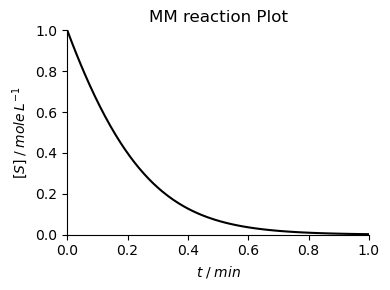

In [96]:
KM_value = 1.5        ### set KM value
Vmax_value = 9.9      ### set Vmax value
S0_value = 1.0        ### set initial substrate concentration value

time_end = 1          ### The end time
n_points = 100        ### number of points - increase if needed

xmax = time_end
ymax = S0_value

print("The integrated rate law for the MM equation")
display(eq)                         

St_expr = eq.rhs.subs({KM: KM_value,       ### substitute the values into the expression
                       Vmax: Vmax_value, 
                       S0:S0_value})

print("The expression that describes A(t) is...")
display(sym.Eq(St,St_expr))               ### The expression now has only one variable, t       

p = sym.plotting.plot(St_expr, (t,0,time_end),
                    line_color='black', 
                    title='MM reaction Plot',
                    xlabel = r"$t\;/\;min$",
                    ylabel = r"$[S] \; / \; mole\,L^{-1}$",
                    axis = True,
                    xlim = (0, xmax),
                    ylim = (0, ymax),
                    size = (4,3),
                    show = False
)
p.save("test.pdf")
p.show()


## Make It a Function

Let us now take this analytical integration of the Michaelis-Menten equation and convert it to a function as we have done previously. Then we can create a set of $x$ and $y$ values and plot the value of the substrate concentration, $[S]$, over time, $t$.

The integrated rate law for the MM equation


Eq(S_t, K_M*LambertW(S_0*exp((S_0 - V_{max}*t)/K_M)/K_M))

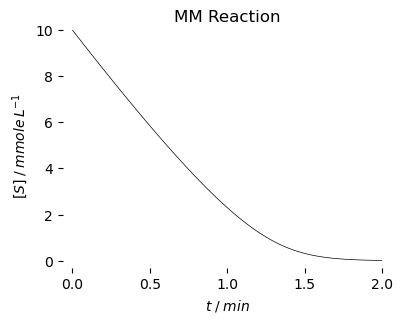

In [97]:
from matplotlib import pyplot as plt
import numpy as np

print("The integrated rate law for the MM equation")
display(eq)                         

##########################
### Set up parameters
##########################


KM_value = 1.5        ### set KM value
Vmax_value = 9.9      ### set Vmax value
S0_value = 10         ### set initial substrate concentration value

time_end = 2          ### The end time
n_points = 100        ### number of points - increase if needed

xmax = time_end       ### change these as you wish
ymax = S0_value

##########################
### create function and calculate x and y data
##########################


f = sym.lambdify([t,S0, KM, Vmax], eq2)   ### create function in terms of t, S0, KM and Vmax

t_line = np.linspace(0,time_end,n_points)       ### the time points

x = t_line                                      ### I always plot x and y so I can more easily reuse plotting code
y = f(t_line, S0_value, KM_value, Vmax_value)   ### Calculate y according to the function
y = np.real(y)                                  ### the Lambert function produces imaginary numbers. Use on the real component

##########################
### plot x and y data
##########################

plt.rcdefaults()     ### resets the plot defaults so we always start in the same place
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,3))  

ax.plot(x, y,
        linestyle = '-',            ### use a line between points
        linewidth='0.5',            ### make the line thin
        color = 'black',            ### the line is black
        zorder = 0                  ### everything is in layer 0 (the bottom layer in this case)
        )
ax.set( xlabel= r"$t\;/\;min$", 
        ylabel=r"$[S] \; / \; mmole\,L^{-1}$",
        title = "MM Reaction",
        xlim=[0, xmax],                  
        ylim=[0, ymax]      
      )

ax.spines['right'].set_visible(False)   ### Make right spine invisible
ax.spines['top'].set_visible(False)     ### Make top spine invisible
ax.spines['left'].set_visible(False)    ### Make left spine invisible
ax.spines['bottom'].set_visible(False)  ### Make bottom spine invisible

ax.spines.left.set_position(('data',-0.03*xmax))   ### space the spines out by 3%
ax.spines.bottom.set_position(('data',-0.03*ymax))

#########################################
### Output the plot
#########################################

plt.savefig("plot.pdf", bbox_inches='tight')     ### export the plot as this
plt.show() 